<a href="https://colab.research.google.com/github/JCaballerot/Deep_learning_program/blob/main/Deep_learning_program/Deep_learning_program/Modulo_IV/Lab_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center"><font size="5">AUTOENCODERS</font></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
Bienvenido a este laboratorio sobre autoencoders.
<font size = "3"> <strong> En este laboratorio encontrarás una explicación de qué es un autoencoder, cómo funciona y verás una implementación de un autoencoder en TensorFlow.</strong></font>
<br>
<br>
<h2>Tabla de Contenidos</h2>
<ol>
 <li><a href="#ref1">Introducción</a></li>
 <li><a href="#ref2">Feature Extraction y Dimensionality Reduction</a></li>
 <li><a href="#ref3">Estructura del Autoencoder</a></li>
 <li><a href="#ref4">Performance</a></li>
 <li><a href="#ref5">Entrenamiento: Loss Function</a></li>
 <li><a href="#ref6">Código</a></li>
</ol>
</div>
<br>
Al final de este laboratorio, debería poder crear autoencoders simples y aplicarlos a problemas que implican aprendizaje no supervisado.
<br>
<p></p>
<hr>

<a id="ref1"></a>
<h2>Introducción</h2>
Un autoencoder, también conocido como autoassociator o Diabolo networks, es una red neuronal artificial empleada para recrear la entrada dada.
Toma un conjunto de entradas <b>sin etiquetar</b>, las codifica y luego intenta extraer la información más valiosa de ellas.
Se utilizan para extracción de características, aprendizaje de modelos generativos de datos, reducción de dimensionalidad y se pueden utilizar para compresión.

Un artículo de 2006 llamado <b> <a href="https://www.cs.toronto.edu/~hinton/science.pdf"> Reducción de la dimensionalidad de los datos con redes neuronales </a>, realizado por GE Hinton y RR Salakhutdinov </b>, mostró mejores resultados que años de refinamiento de otros tipos de red, y fue un gran avance en el campo de las redes neuronales, un campo que estuvo "estancado" durante 10 años.

Ahora, los autoencoders, basados en máquinas restringidas de Boltzmann, se emplean en algunas de las aplicaciones de deep learning más grandes. Son los componentes básicos de Deep Belief Networks (DBN).

<center><img src="https://ibm.box.com/shared/static/xlkv9v7xzxhjww681dq3h1pydxcm4ktp.png" style="width: 350px;"></center>

<hr>

<a id="ref2"></a>
<h2>Feature Extraction y Dimensionality Reduction</h2>

Un ejemplo dado por Nikhil Buduma en KdNuggets (<a href="http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html"> enlace </a>) dio un Excelente explicación de la utilidad de este tipo de redes neuronales.

Digamos que quieres extraer la emoción que siente la persona en una fotografía. Usando la siguiente imagen en escala de grises de 256x256 píxeles como ejemplo:

<img src="https://ibm.box.com/shared/static/r5knpow4bk2farlvxia71e9jp2f2u126.png">

Pero cuando usamos esta imagen, ¡comenzamos a encontrarnos con un cuello de botella! ¡Porque esta imagen con un tamaño de 256x256 píxeles se corresponde con un vector de entrada de 65536 dimensiones! Si usáramos una imagen producida con cámaras de celular convencionales, que genera imágenes de 4000 x 3000 píxeles, tendríamos 12 millones de dimensiones para analizar.


Este cuello de botella se problematiza aún más a medida que aumenta la dificultad de un problema de machine learning a medida que se involucran más dimensiones. Según un estudio de 1982 de CJ Stone (<a href="http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf"> enlace </a>), el momento de ajustarse a un modelo, es óptimo si:
<br><br>
<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3><strong>$$m^{-p/(2p+d)}$$</strong></h3>
<br>
Donde:
<br>
m: número de datos
<br>
d: dimensionalidad de los datos
<br>
p: Parámetros del modelo
</div>

Como puede ver, ¡aumenta exponencialmente!
Volviendo a nuestro ejemplo, no necesitamos utilizar todas las 65.536 dimensiones para clasificar una emoción. Un humano identifica las emociones de acuerdo con una expresión facial específica, algunas <b> características clave </b>, como la forma de la boca y las cejas.

<center><img src="https://ibm.box.com/shared/static/m8urvuqujkt2vt1ru1fnslzh24pv7hn4.png" height="256" width="256"></center>

<hr>

<a id="ref3"></a>
<h2>Estructura del Autoencoder</h2>

<img src="https://ibm.box.com/shared/static/no7omt2jhqvv7uuls7ihnzikyl9ysnfp.png" style="width: 400px;">


Un autoencoder se puede dividir en dos partes, el <b> encoder </b> y el <b> decoder </b>.

El encoder necesita comprimir la representación de una entrada. En este caso vamos a reducir la dimensión del rostro de nuestro actor, de 2000 dimensiones a solo 30 dimensiones, haciendo pasar los datos por capas de nuestro encoder.

El decoder funciona como una red de encoders a la inversa. Funciona para recrear la entrada lo más fielmente posible. Esto juega un papel importante durante el entrenamiento, porque obliga al codificador automático a seleccionar las características más importantes en la representación comprimida.


<hr>

<a id="ref4"></a>
<h2>Performance</h2>

Una vez realizado el entrenamiento, puede utilizar los datos codificados como datos fiables reducidos dimensionalmente, aplicándolos a cualquier problema donde la reducción dimensional parezca apropiada.


<img src="https://ibm.box.com/shared/static/yt3xyon4g2jyw1w9qup1mvx7cgh28l64.png">


Esta imagen fue extraída del <a href="https://www.cs.toronto.edu/~hinton/science.pdf"> artículo </a> de GE Hinton y RR Salakhutdinov, sobre la reducción bidimensional para 500 dígitos del MNIST, con PCA a la izquierda y autoencoder a la derecha. Podemos ver que el autoencoder nos proporcionó una mejor separación de datos.

<hr>

<a id="ref5"></a>
<h2>Entrenamiento: Loss function</h2>

Un autoencoder utiliza la función de pérdida para entrenar adecuadamente la red. La función de pérdida calculará las diferencias entre nuestra producción y los resultados esperados. Después de eso, podemos minimizar este error con el descenso de gradiente. Hay más de un tipo de función de pérdida, depende del tipo de datos.

<h3>Valores Binarios:</h3>
$$l(f(x)) = - \sum_{k} (x_k log(\hat{x}_k) + (1 - x_k) \log (1 - \hat{x}_k) \ )$$

Para valores binarios, podemos usar una ecuación basada en la suma de la entropía cruzada de Bernoulli.

$ x_k $ es una de nuestras entradas y $\hat{x}_k $ es la salida respectiva.

Usamos esta función para que si $ x_k $ es igual a uno, queremos acercar $ \hat{x}_k$ lo más cerca posible de uno. Lo mismo si $x_k$ es igual a cero.

Si el valor es uno, solo necesitamos calcular la primera parte de la fórmula, es decir, $-x_klog(\hat{x}_k)$. Lo cual resulta simplemente calcular $-log (\hat{x}_k)$.

Y si el valor es cero, necesitamos calcular solo la segunda parte, $(1 - x_k) \log (1 - \hat{x}_k) \ )$ - que resulta ser $log (1 - \hat{x}_k) $.



<h3>Real values:</h3>
$$l(f(x)) = - \frac{1}{2}\sum_{k} (\hat{x}_k- x_k \ )^2$$

Como la función anterior se comportaría mal con entradas que no sean 0 o 1, podemos usar la suma de diferencias al cuadrado para nuestra función de pérdida. Si usa esta función de pérdida, es necesario que use una función de activación lineal para la capa de salida.

Como en el ejemplo anterior, $ x_k $ es una de nuestras entradas y $\hat{x}_k $ es la salida respectiva, y queremos que nuestra salida sea lo más similar posible a nuestra entrada.

<h3>Loss Gradient:</h3>

$$\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))  = \hat{x}^{(t)} - x^{(t)} $$

Usamos el descenso del gradiente para alcanzar el mínimo local de nuestra función $l( \ f(x^{(t)})$, dando pasos hacia el negativo del gradiente de la función en el punto actual.

Nuestra función sobre el gradiente $(\nabla_{\hat{a}(x^{(t)})})$ de la pérdida de $l( \ f(x^{(t)})$ en la preactivación de la capa de salida.

En realidad, es una fórmula simple, se hace calculando la diferencia entre nuestra salida $\hat{x}^{(t)}$ y nuestra entrada $x^{(t)}$.

Entonces nuestra red propaga hacia atrás nuestro gradiente $\nabla_{\hat{a}(x^{(t)})} \ l( \ f(x^{(t)}))$ a través de la red usando <b>backpropagation</b>.

<hr>

<a id="ref6"></a>
<h2>Codigo</h2>

Para esta parte, analizamos una gran cantidad de código Python 2.7.11. Vamos a utilizar el conjunto de datos MNIST para nuestro ejemplo. Puede encontrar mas detalle del código en <a href="https://github.com/aymericdamien"> aquí </a>. 

Llamemos a nuestras librerías y hagamos que los datos MNIST estén disponibles para su uso.

In [ ]:
!pip uninstall -y tensorflow
!pip install tensorflow-gpu==1.14.0

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 377.1 MB 7.5 kB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 3.1 MB 31.1 MB/s 
     |████████████████████████████████| 488 kB 61.6 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


In [ ]:
#!pip install tensorflow==1.12.0
import tensorflow as tf
print(tf.__version__)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0


/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [ ]:
#from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importando data MINST
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from t

Ahora, seteemos los parámetros que va a utilizar nuestra red.

In [ ]:
learning_rate = 0.01
training_epochs = 20
batch_size = 256
display_step = 1
examples_to_show = 10

# Parámetros de la red
n_hidden_1 = 256 # 1ra capa num unidades
n_hidden_2 = 128 # 2da capa num unidades
n_input = 784 # MNIST input (img shape: 28*28)

# tf Graph input (solo fotos)
X = tf.placeholder("float", [None, n_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input])),
}

Ahora necesitamos crear nuestro codificador. Para ello vamos a utilizar funciones sigmoides. Las funciones sigmoides ofrecen excelentes resultados con este tipo de red. Esto se debe a que tiene un buen derivado que se adapta bien a la retropropagación. Podemos crear nuestro codificador usando la función sigmoidal como esta:

In [ ]:
# Construyendo el encoder
def encoder(x):
    # Encoder primera capa con activation sigmoide #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder segunda capa con activation sigmoide #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']), biases['encoder_b2']))
    return layer_2

Y el decodificador:

Puede ver que layer_1 en el codificador es layer_2 en el decodificador y viceversa.

In [ ]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']), biases['decoder_b2']))
    return layer_2

Construyamos nuestro modelo.
En la variable <code> cost </code> tenemos la función de pérdida y en la variable <code> optimizer </code> tenemos nuestro gradiente usado para el backpropagation.

In [ ]:
# Construir modelo
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Imagenes Recontruidas
y_pred = decoder_op
# Targets (Labels) son el input de la data.
y_true = X

# Definir pérdida y optimizador, error cuasrático medio
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

# Inicializando las variables
init = tf.global_variables_initializer()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Para entrenar correremos 20 epochs.

In [ ]:
# Lanzar el gráfico
# Uso de InteractiveSession
sess = tf.InteractiveSession()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)
# Ciclo de entrenamiento
for epoch in range(training_epochs):
    # Loop sobre los batches
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        # Ejecutar optimización op (backprop) y costo op (para obtener el loss value)
        _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
    # Printear logs en cada epoch
    if epoch % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1),
              "cost=", "{:.9f}".format(c))

print("Optimization terminada!")

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Epoch: 0001 cost= 0.204451159
Epoch: 0002 cost= 0.164791748
Epoch: 0003 cost= 0.153227404
Epoch: 0004 cost= 0.146028191
Epoch: 0005 cost= 0.136467472
Epoch: 0006 cost= 0.134842932
Epoch: 0007 cost= 0.130332232
Epoch: 0008 cost= 0.126416057
Epoch: 0009 cost= 0.125323206
Epoch: 0010 cost= 0.123249792
Epoch: 0011 cost= 0.116882540
Epoch: 0012 cost= 0.113757364
Epoch: 0013 cost= 0.114029534
Epoch: 0014 cost= 0.108852327
Epoch: 0015 cost= 0.107307881
Epoch: 0016 cost= 0.106735036
Epoch: 0017 cost= 0.107565314
Epoch: 0018 cost= 0.103802912
Epoch: 0019 cost= 0.103620626
Epoch: 0020 cost= 0.104003131
Optimization terminada!


Ahora, apliquemos codificador y decodificador para nuestras pruebas.

In [ ]:
# Aplicando el encoder y decoder sobre la data test
encode_decode = sess.run(
    y_pred, feed_dict={X: mnist.test.images[:examples_to_show]})

Visualicemos nuestros resultados

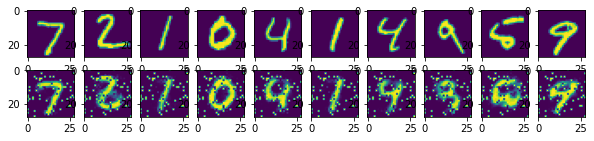

In [ ]:
# Comparar imágenes originales con sus reconstrucciones
f, a = plt.subplots(2, 10, figsize=(10, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))


Como puede ver, las reconstrucciones tuvieron éxito. Se puede ver que se agregó algo de ruido a la imagen.

<hr>

### Gracias por completar este laboratorio!

### Referencias:
- https://en.wikipedia.org/wiki/Autoencoder
- http://ufldl.stanford.edu/tutorial/unsupervised/Autoencoders/
- http://www.slideshare.net/billlangjun/simple-introduction-to-autoencoder
- http://www.slideshare.net/danieljohnlewis/piotr-mirowski-review-autoencoders-deep-learning-ciuuk14
- https://cs.stanford.edu/~quocle/tutorial2.pdf
- https://gist.github.com/hussius/1534135a419bb0b957b9
- http://www.deeplearningbook.org/contents/autoencoders.html
- http://www.kdnuggets.com/2015/03/deep-learning-curse-dimensionality-autoencoders.html/
- https://www.youtube.com/watch?v=xTU79Zs4XKY
- http://www-personal.umich.edu/~jizhu/jizhu/wuke/Stone-AoS82.pdf